# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '4_August'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

# Reset index
df_bottom_20.index = np.arange(1, len(df_bottom_20) + 1)
df_top_20.index = np.arange(1, len(df_top_20) + 1)

# Round wageredamt and profit to 2 decimal places
df_bottom_20['wageredamt'] = df_bottom_20['wageredamt'].round(1)
df_bottom_20['profit'] = df_bottom_20['profit'].round(1)
df_bottom_20['percent_return'] = df_bottom_20['percent_return'].round(1)
df_top_20['wageredamt'] = df_top_20['wageredamt'].round(1)
df_top_20['profit'] = df_top_20['profit'].round(1)
df_top_20['percent_return'] = df_top_20['percent_return'].round(1)

In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_bottom_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_bottom_20 = pd.concat([df_bottom_20, dummy_variables], axis=1).reset_index(drop=True)

# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_top_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_top_20 = pd.concat([df_top_20, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])


In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df_bottom_20['time_diff'] = df_bottom_20.groupby(['playerkey', 'session_time'])['start_time'].diff()
df_top_20['time_diff'] = df_top_20.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df_bottom_20['time_diff'] = df_bottom_20['time_diff'].dt.total_seconds().fillna(0)
df_top_20['time_diff'] = df_top_20['time_diff'].dt.total_seconds().fillna(0)


## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in bottom 20%:", len(df_bottom_20['playerkey'].unique()))
print("Number of gamblers in top 20%:", len(df_top_20['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in bottom 20%:", len(df_bottom_20['visit'].unique()))
print("Number of unique visits in top 20%:", len(df_top_20['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in bottom 20%:", len(df_bottom_20['session_time'].unique()))
print("Number of unique sessions in top 20%:", len(df_top_20['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in bottom 20%:", len(df_bottom_20['session_machine'].unique()))
print("Number of unique sessions on session_machine in top 20%:", len(df_top_20['session_machine'].unique()))




Number of gamblers in bottom 20%: 2561
Number of gamblers in top 20%: 2573
--------------------------------------------------
Number of unique visits in bottom 20%: 4
Number of unique visits in top 20%: 19
--------------------------------------------------
Number of unique sessions in bottom 20%: 3
Number of unique sessions in top 20%: 10
--------------------------------------------------
Number of unique sessions on session_machine in bottom 20%: 18
Number of unique sessions on session_machine in top 20%: 2856


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'visit')
df_top_20 = pf.consecutive_wins(df_top_20, 'visit')


In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
        #2ws   #3ws  #4ws
visit                    
1      610.0  107.0  25.0
2       19.0    3.0   2.0
3        2.0    0.0   0.0
4        2.0    0.0   0.0
--------------------------------------------------
Top 20
          #2ws    #3ws    #4ws
visit                         
1      24909.0  4476.0  1285.0
2      18698.0  3474.0  1043.0
3       9987.0  1857.0   592.0
4       3897.0   753.0   229.0
5       1427.0   285.0    71.0
6        671.0   115.0    37.0
7        453.0    96.0    22.0
8        344.0    63.0    17.0
9        301.0    83.0    33.0
10       135.0    24.0     7.0
11        91.0    21.0     9.0
12       107.0    22.0     3.0
13        63.0     6.0     0.0
14        81.0    11.0     2.0
15        37.0     4.0     0.0
16        26.0     3.0     1.0
17        16.0     1.0     0.0
18         1.0     0.0     0.0
19        10.0     1.0     0.0


In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df_bottom_20_s = pf.consecutive_wins(df_bottom_20, 'session_time')
df_top_20_s = pf.consecutive_wins(df_top_20, 'session_time')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
               #2ws   #3ws  #4ws
session_time                    
1             623.0  105.0  24.0
2               9.0    6.0   3.0
3               0.0    0.0   0.0
--------------------------------------------------
Top 20
                 #2ws    #3ws    #4ws
session_time                         
1             36465.0  6795.0  2086.0
2             14675.0  2612.0   770.0
3              6209.0  1239.0   348.0
4              2484.0   418.0    91.0
5               934.0   151.0    38.0
6               314.0    67.0    10.0
7                97.0     8.0     4.0
8                60.0     5.0     1.0
9                 5.0     0.0     0.0
10                4.0     1.0     0.0


### Rank Differences

Number of unique players in bottom 20%:
rank
1.0    2326
2.0      44
3.0      32
6.0     159
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
rank
1.0    1655
2.0     214
3.0     184
6.0     520
Name: playerkey, dtype: int64
--------------------------------------------------


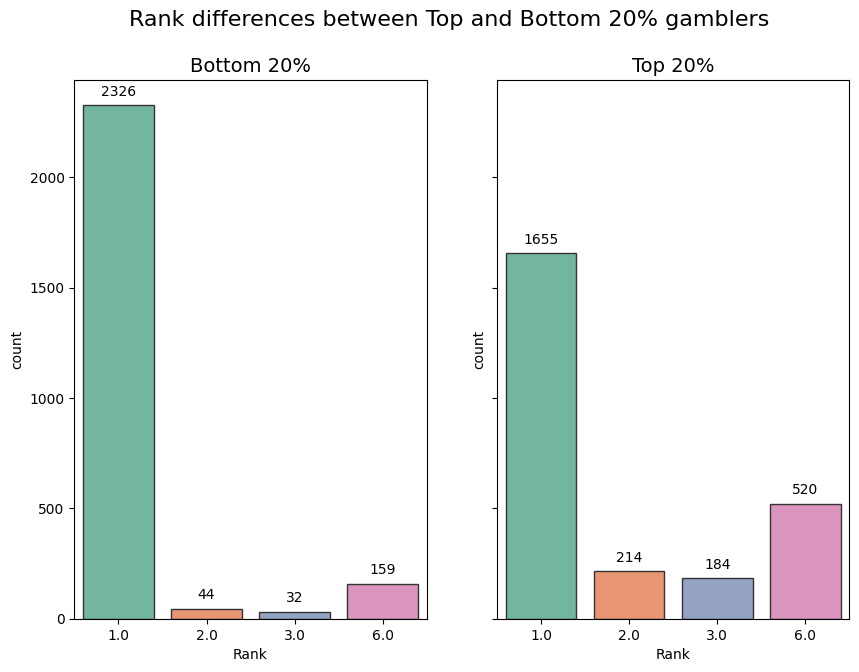

In [10]:
# For every unique rank, print the number of unique players
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('rank', df_top_20, df_bottom_20, title='Rank', figsize=(10, 7))

### Gender Differences

Number of unique players in bottom 20%:
gender
F    1255
M    1306
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    1185
M    1388
Name: playerkey, dtype: int64
--------------------------------------------------


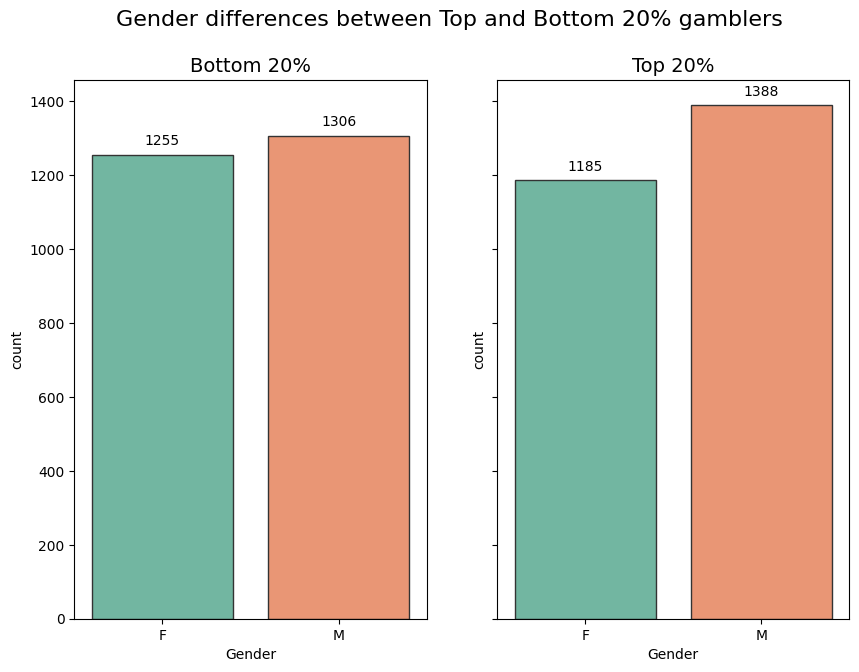

In [11]:
# Gender differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('gender', df_top_20, df_bottom_20, title='Gender', figsize=(10, 7))

### Age Differences

In [12]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

Number of unique players in bottom 20%:
age_range
18-24     149
25-40    1117
41-55     682
56-75     561
76+        52
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24      29
25-40     507
41-55     920
56-75    1039
76+        78
Name: playerkey, dtype: int64
--------------------------------------------------


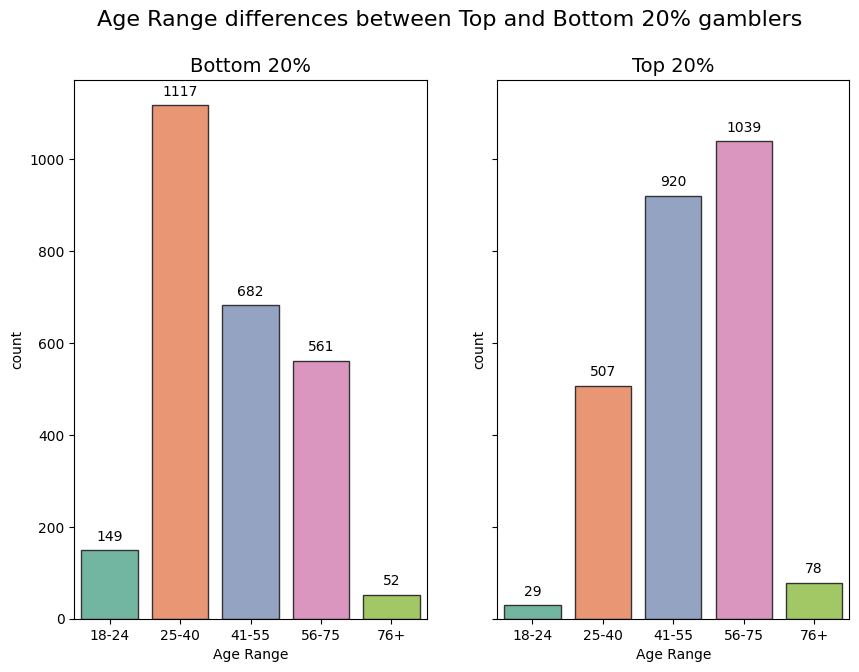

In [13]:
# Age range differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_range', df_top_20, df_bottom_20, title='Age Range', figsize=(10, 7))

Number of unique players in bottom 20%:
age_gen
Gen Z            149
Millenials      1117
Gen X            682
Baby Boomers     561
Silent            52
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z             29
Millenials       507
Gen X            920
Baby Boomers    1039
Silent            78
Name: playerkey, dtype: int64
--------------------------------------------------


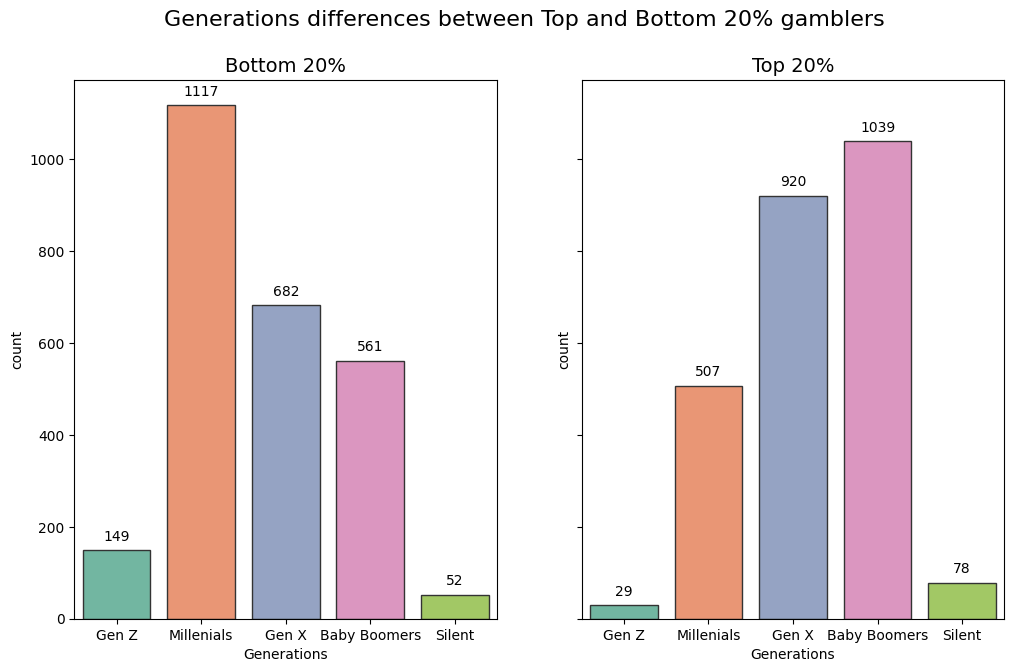

In [14]:
# Age generation differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_gen', df_top_20, df_bottom_20, title='Generations', figsize=(12, 7))


Male age differences in bottom 20%:
age_range
18-24     68
25-40    606
41-55    336
56-75    271
76+       25
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24     81
25-40    511
41-55    346
56-75    290
76+       27
Name: playerkey, dtype: int64


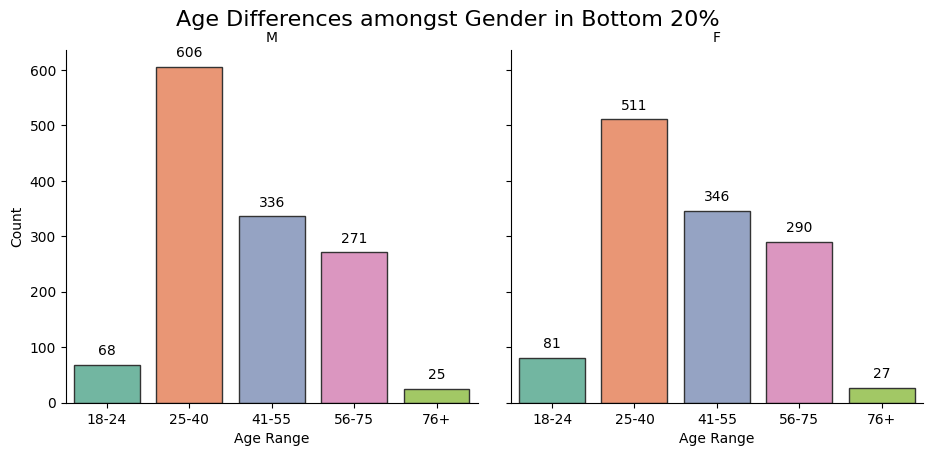

In [15]:
# Age range of male gamblers in bottom 20%
print("Male age differences in bottom 20%:")
print(df_bottom_20[df_bottom_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in bottom 20%
print('Female age differences in bottom 20%:')
print(df_bottom_20[df_bottom_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df_bottom_20, 'Bottom 20%', figsize=(10, 5))


Male age differences in top 20%:
age_range
18-24     19
25-40    333
41-55    492
56-75    507
76+       37
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24     10
25-40    174
41-55    428
56-75    532
76+       41
Name: playerkey, dtype: int64
--------------------------------------------------


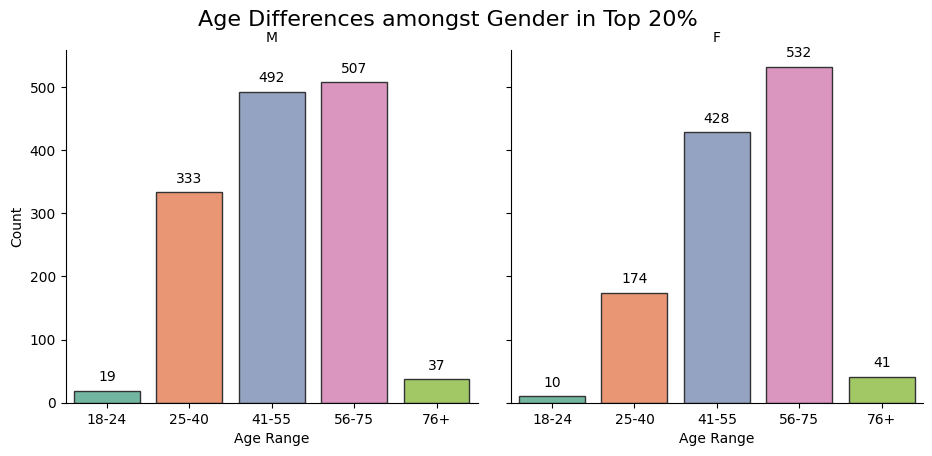

In [16]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot gender differences
pf.plot_gender_diff(df_top_20, 'Top 20%', figsize=(10, 5))

### Increse and Decrease of SlotDenomination and Bet

In [17]:
# Lets cound the number of times a player increase slot denominations
players_increase_slot_t20 = cf.count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = cf.count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_t20 = cf.count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = cf.count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 2000
Count of times each player increase_slotdeno : {93: 2, 94: 1, 111: 1, 113: 4, 198: 6, 224: 6, 227: 1, 234: 55, 381: 1, 424: 2, 433: 1, 450: 10, 460: 21, 575: 17, 603: 82, 646: 2, 668: 56, 683: 10, 719: 122, 745: 3, 865: 1, 996: 4, 1008: 12, 1013: 3, 1029: 1, 1069: 4, 1136: 3, 1166: 33, 1194: 2, 1233: 29, 1243: 1, 1263: 1, 1318: 7, 1358: 20, 1371: 4, 1376: 3, 1402: 3, 1469: 1, 1483: 3, 1553: 2, 1563: 4, 1604: 1, 1700: 3, 1722: 3, 1757: 7, 1764: 1, 1890: 1, 1909: 3, 1932: 1, 1950: 1, 1953: 5, 1982: 1, 2001: 2, 2046: 1, 2047: 3, 2070: 1, 2073: 11, 2097: 20, 2157: 58, 2197: 1, 2198: 5, 2214: 6, 2236: 3, 2325: 5, 2331: 11, 2341: 6, 2343: 9, 2479: 2, 2561: 9, 2681: 1, 2710: 2, 2713: 1, 2736: 421, 2806: 6, 2858: 5, 2906: 4, 2959: 10, 2982: 1, 2993: 2, 3010: 10, 3058: 1, 3059: 1, 3124: 3, 3127: 11, 3155: 2, 3161: 41, 3319: 1, 3359: 9, 3360: 33, 3385: 18, 3586: 1, 3634: 10, 3677: 36, 3708: 3, 3867: 2, 3900: 4, 3955: 3, 4015: 2, 4050: 1, 4236: 1, 424

In [18]:
# Lets do the same but for bottom 20%
players_increase_slot_b20 = cf.count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_b20 = cf.count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_b20 = cf.count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_b20 = cf.count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 261
Count of times each player increase_slotdeno : {1230: 2, 1993: 1, 3754: 1, 5044: 1, 5112: 1, 5677: 1, 6615: 1, 6954: 1, 7746: 2, 8251: 1, 9818: 1, 12023: 3, 12456: 1, 13487: 1, 14308: 1, 15430: 1, 16001: 1, 16583: 1, 16586: 1, 16865: 1, 16871: 1, 16963: 1, 16971: 1, 16976: 1, 17047: 1, 17060: 1, 17124: 1, 17162: 1, 17168: 1, 17255: 1, 17395: 1, 17463: 5, 17492: 1, 17543: 1, 17553: 1, 17643: 1, 17718: 2, 17775: 2, 17837: 1, 17841: 1, 17897: 1, 18001: 2, 18103: 1, 18136: 1, 18238: 1, 18358: 1, 18451: 1, 18456: 1, 18514: 1, 18538: 1, 18548: 2, 18674: 1, 18748: 1, 18839: 4, 19005: 1, 19121: 1, 19122: 1, 19215: 1, 19287: 1, 19309: 1, 19339: 1, 19403: 1, 19411: 2, 19517: 1, 19538: 1, 19674: 1, 19716: 1, 19727: 1, 19811: 1, 19818: 1, 19830: 1, 19908: 1, 19923: 1, 19945: 3, 19960: 1, 20023: 1, 20040: 1, 20091: 1, 20108: 1, 20136: 2, 20151: 1, 20210: 2, 20211: 1, 20216: 1, 20318: 1, 20512: 1, 20575: 1, 20589: 1, 20626: 1, 20645: 1, 20748: 1, 20798: 1

### Wealth Differences
#### General

In [19]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_bottom_20['depletion_rate'] = df_bottom_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)
df_top_20['depletion_rate'] = df_top_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


Total amount won or lost by all players in bottom 20%:
-13823.898
Average amount won or lost by each player in bottom 20%:
-5.4
-------------------------------------------------------
Total amount won or lost by all players in top 20%:
50288.312
Average amount won or lost by each player in top 20%:
19.54


Text(0.5, 0, 'Ending Balance')

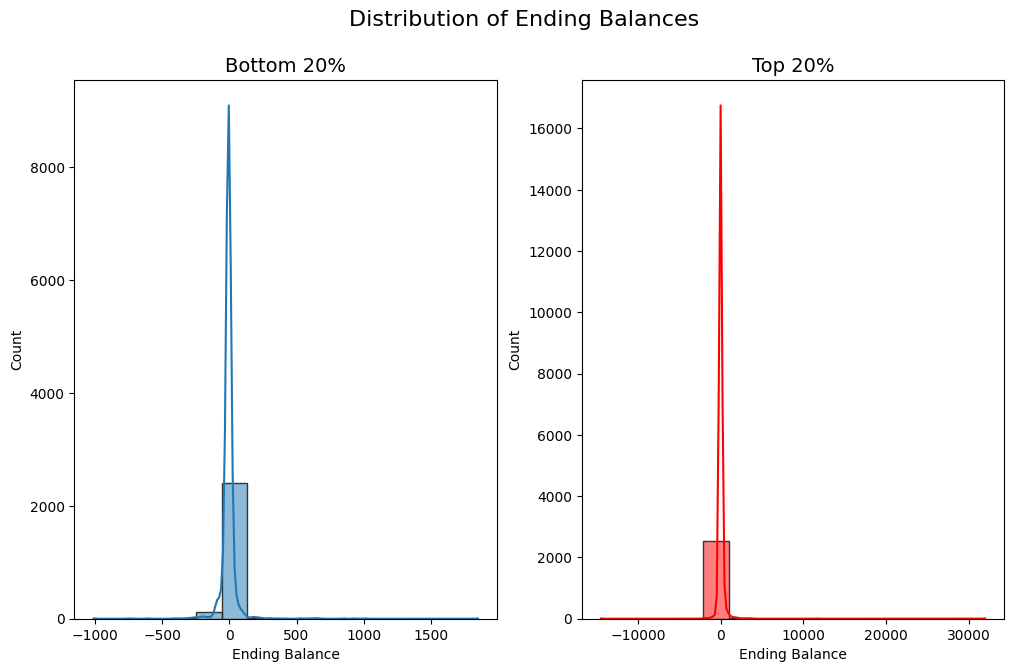

In [20]:
# Total amoun lost or won by all players in bottom 20%
# Group by 'playerkey'
grouped_b = df_bottom_20.groupby('playerkey')

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Calculate the total amount won or lost by all players
b_amount_won_lost_total = grouped_b['playercashableamt'].last().sum() - grouped_b['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
b_amount_won_lost_avg = b_amount_won_lost_total / len(grouped_b)

# Total amoun lost or won by all players in top 20%
# Group by 'playerkey'
grouped_t = df_top_20.groupby('playerkey')

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Calculate the total amount won or lost by all players
t_amount_won_lost_total = grouped_t['playercashableamt'].last().sum() - grouped_t['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
t_amount_won_lost_avg = t_amount_won_lost_total / len(grouped_t)

# Prin Results
print('Total amount won or lost by all players in bottom 20%:')
print(b_amount_won_lost_total)
print('Average amount won or lost by each player in bottom 20%:')
print(round(b_amount_won_lost_avg, 2))
print('-------------------------------------------------------')
print('Total amount won or lost by all players in top 20%:')
print(t_amount_won_lost_total)
print('Average amount won or lost by each player in top 20%:')
print(round(t_amount_won_lost_avg, 2))

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Set Title
fig.suptitle('Distribution of Ending Balances', fontsize=16)
# Plot histogram of amount won or lost by all players in bottom 20%
sns.histplot(b_amount_won_lost_each, ax=ax[0], bins=15, kde=True, edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Ending Balance')

# Plot histogram of amount won or lost by all players in top 20%
sns.histplot(t_amount_won_lost_each, ax=ax[1], bins=15, kde=True, edgecolor=".2", color='red')
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Ending Balance')

#### Per Visit

In [21]:
# Create dataframe
df_all_v = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', print_results=False)

In [22]:
# Simultaneous Play
df_b20_sim_v = pf.simultaneous_play(40000, df_bottom_20, 'visit')
df_t20_sim_v = pf.simultaneous_play(40000, df_top_20, 'visit')

# Concat the two dataframes
df_sim_v = pd.concat([df_b20_sim_v, df_t20_sim_v]).reset_index()

print(df_sim_v)
# Remove repeated instances
df_sim_no_repeat_v = df_sim_v.drop_duplicates(subset=['visit', 'playerkey'])

print(len(df_sim_no_repeat_v))

      index  visit  playerkey
0         0      1      17400
1         1      1      17463
2         2      1      18448
3         3      1      19605
4         4      1      19605
...     ...    ...        ...
1051   1037     10       1008
1052   1038     10      18059
1053   1039     13      18059
1054   1040     14      18059
1055   1041     15      18059

[1056 rows x 3 columns]
      index  visit  playerkey
0         0      1      17400
1         1      1      17463
2         2      1      18448
3         3      1      19605
5         5      1      21410
...     ...    ...        ...
1051   1037     10       1008
1052   1038     10      18059
1053   1039     13      18059
1054   1040     14      18059
1055   1041     15      18059

[535 rows x 3 columns]


In [23]:
# Merge Sim play
df_all_v['sim_play'] = df_all_v[['playerkey', 'visit']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_v[['playerkey', 'visit']].values)), axis=1)

# Eliimante discrepancies
# Print number of unique players
print("Number of unique players in df_all_v: ", df_all_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy = df_all_v[df_all_v.isna().any(axis=1)]['playerkey'].unique()

# Print number of players with NaN values
print("Number of players with NaN values: ", len(list_discrepancy))

# Remove discrepancies
df_all_v = df_all_v[~df_all_v['playerkey'].isin(list_discrepancy)]

print(df_all_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']


df_all_v = df_all_v.reindex(columns=desired_order)

Number of unique players in df_all_v:  5134
Number of players with NaN values:  156
Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', 'ave_time_

##### Distribution Ending Balances

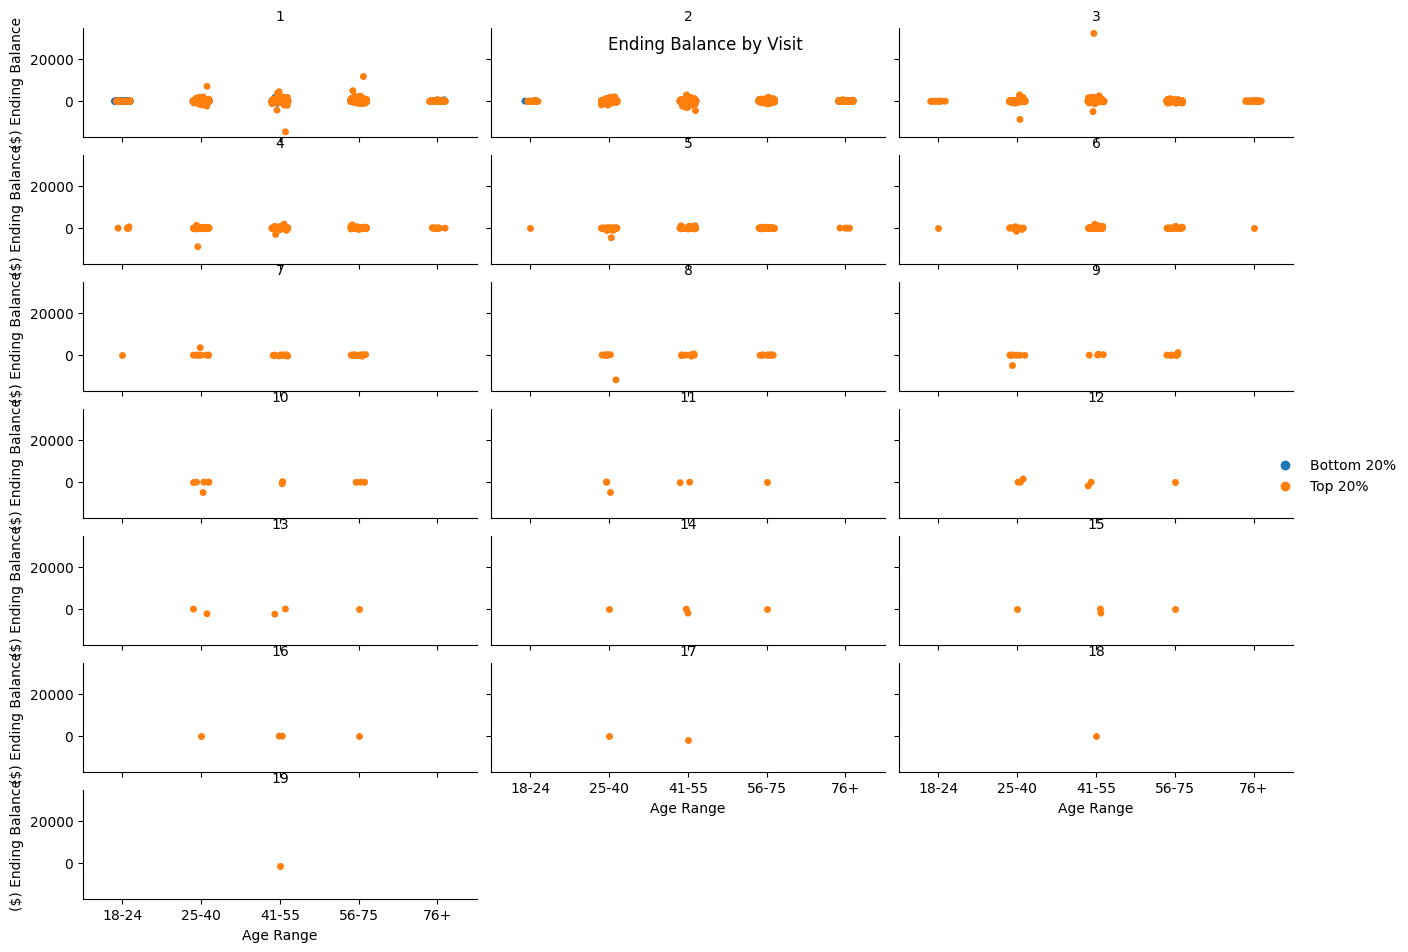

In [24]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


##### Overall Gains/Loses

In [25]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -4655.321289
        Top 20%       10744.416016
M       Bottom 20%    -9801.322266
        Top 20%      -10059.991211
Name: ending_balance, dtype: float32
-------------------------------------------------------
visit  gender  percentile
1      F       Bottom 20%    -4524.350586
               Top 20%       24864.851562
       M       Bottom 20%    -8851.885742
               Top 20%       21917.855469
2      F       Bottom 20%     -120.970879
               Top 20%        -359.876434
       M       Bottom 20%     -689.187256
               Top 20%       -3441.641846
3      F       Bottom 20%        5.000000
               Top 20%       -1387.687744
       M       Bottom 20%     -175.250000
               Top 20%       16026.625977
4      F       Bottom 20%      -15.000000
               Top 20%       -2362.926270
       M       Bottom 20%      -85.000000
               Top 20%      -14444.861328
5      F       Top 20%     

In [26]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
         playerkey  rank age_range gender  ending_balance
454917        3825   3.0     56-75      M         11620.0
5520205      23355   3.0     41-55      M         31980.0
Outlier Players with losses greater than $10,000:
         playerkey  rank age_range gender  ending_balance
1788603      17128   3.0     41-55      M        -14496.0
4824696      22070   3.0     25-40      M        -11672.0
[3825, 23355, 17128, 22070]
Without Outliers present:
                   ending_balance
gender percentile                
F      Bottom 20%    -4655.321289
       Top 20%       10744.416016
M      Botto

#### Per Session

In [27]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', print_results=False)

In [28]:
# Simultaneous Play
df_b20_sim_s = pf.simultaneous_play(40000, df_bottom_20, 'session_time')
df_t20_sim_s = pf.simultaneous_play(40000, df_top_20, 'session_time')

# Concat the two dataframes
df_sim_s = pd.concat([df_b20_sim_s, df_t20_sim_s]).reset_index()

print(df_sim_s)
# Remove repeated instances
df_sim_no_repeat_s = df_sim_s.drop_duplicates(subset=['session_time', 'playerkey'])

print(df_sim_no_repeat_s)

      index  session_time  playerkey
0         0             1      17400
1         1             1      17463
2         2             1      18448
3         3             1      19605
4         4             1      19605
...     ...           ...        ...
1210   1197             8      16591
1211   1198             8      16591
1212   1199             8      16591
1213   1200             8      16591
1214   1201             8      22953

[1215 rows x 3 columns]
      index  session_time  playerkey
0         0             1      17400
1         1             1      17463
2         2             1      18448
3         3             1      19605
5         5             1      21411
...     ...           ...        ...
1207   1194             7      16591
1208   1195             7      23321
1209   1196             8       6468
1210   1197             8      16591
1214   1201             8      22953

[648 rows x 3 columns]


In [29]:
# Merge Sim play
df_all_s['sim_play'] = df_all_s[['playerkey', 'session_time']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_s[['playerkey', 'session_time']].values)), axis=1)

# Eliminate discrepancies
df_all_s = df_all_s[df_all_s['playerkey'].isin(list_discrepancy) == False]

# Eliimante discrepancies
# Print number of unique players
print("Number of unique players in df_all_1min: ", df_all_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy = df_all_s[df_all_s.isna().any(axis=1)]['playerkey'].unique()

# Print number of players with NaN values
print("Number of players with NaN values: ", len(list_discrepancy))

# Eliminate discrepancies
df_all_s = df_all_s[df_all_s['playerkey'].isin(list_discrepancy) == False]

print(df_all_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']

df_all_s = df_all_s.reindex(columns=desired_order)

Number of unique players in df_all_1min:  4978
Number of players with NaN values:  15
Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', '

##### Distribution Ending Balances

Text(0.5, 0.98, 'Ending Balance by Visit')

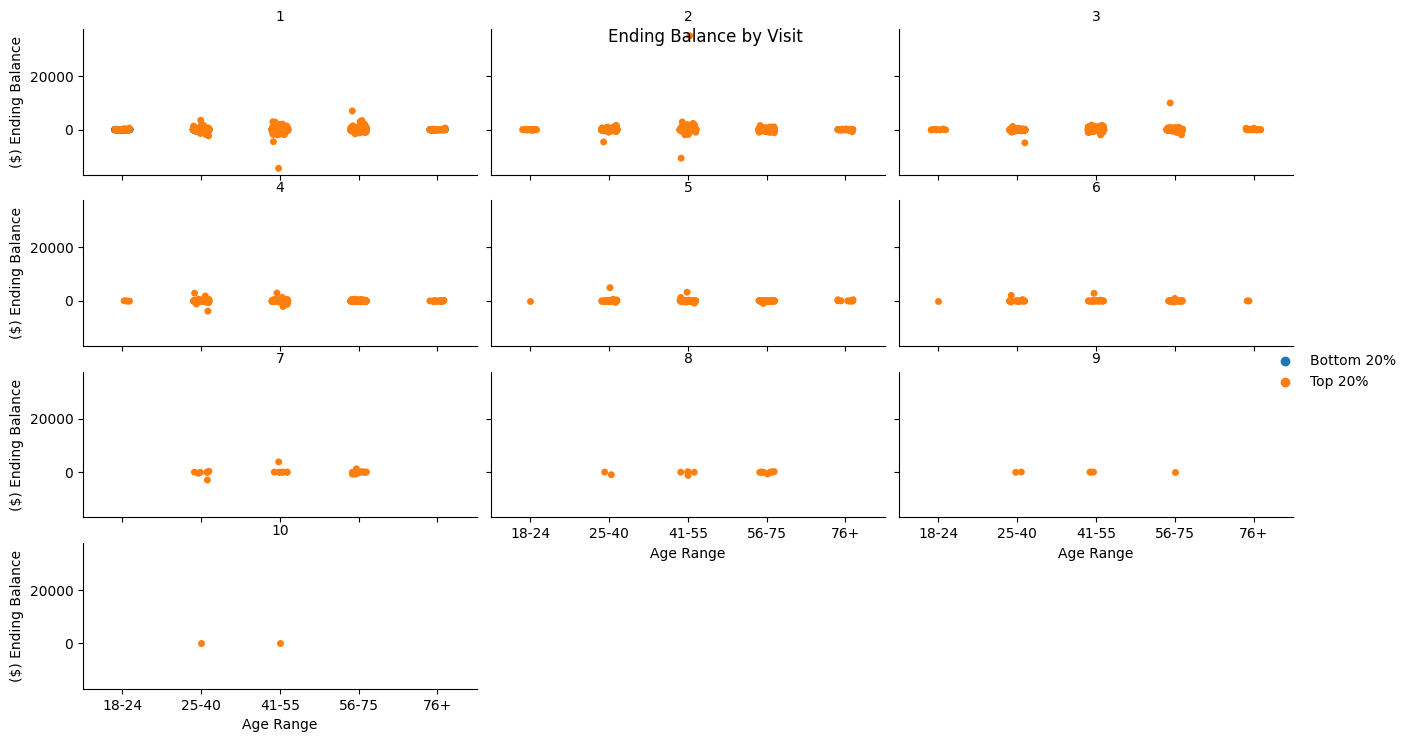

In [30]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


In [32]:
# Outliers - Players who make over the cut_off
df_no_outliers_s = pf.remove_outliers(df_all_s, cut_off=cut_off)
# Save dataframe to paquet file
df_no_outliers_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_NO.parquet')


Outlier Players with gains greater than $10,000:


KeyError: "['rank'] not in index"

##### Overall Gains/Loses

In [ ]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')